In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np

In [2]:
# Load the geometry GeoDataFrame
agg_point_gdf = gpd.read_file("data/agg_point_berlin.shp")
agg_polygon_gdf = gpd.read_file("data/agg_polygon_berlin.shp")

# Concatenate the two GeoDataFrames
agg_gdf = gpd.GeoDataFrame(pd.concat([agg_point_gdf, agg_polygon_gdf], ignore_index=True))

In [7]:
agg_gdf.columns = ['district name', 'source node', 'amenity node', 'leisure/shop', 'amenity type', 'amenity', 'geometry']
agg_gdf.head(5)

,district name,source node,amenity node,leisure/shop,amenity type,amenity,geometry
0,Treptow-Köpenick,5783247761,536387498,leisure,playground,None,POINT (13.60158 52.44007)
1,Treptow-Köpenick,5783247761,536387502,leisure,playground,None,POINT (13.60277 52.44069)
2,Treptow-Köpenick,5783247761,691264855,leisure,sauna,None,POINT (13.54483 52.43735)
3,Treptow-Köpenick,5783247761,799289307,leisure,marina,None,POINT (13.58381 52.42363)
4,Treptow-Köpenick,5783247761,1358382380,leisure,pitch,None,POINT (13.54387 52.40646)


In [3]:
# Load the DataFrame from CSV file
grouped_geom_shops = pd.read_csv('data/agg_grouped_Berlin_shops.csv')
grouped_geom_leisures = pd.read_csv('data/agg_grouped_Berlin_leisures.csv')

In [4]:
grouped_geom_shops.set_index(['district name', 'amenity type'], inplace=True)
grouped_geom_shops.columns = ['source node', 'amenity type']


grouped_geom_leisures.set_index(['district name', 'amenity type'], inplace=True)
grouped_geom_leisures.columns = ['source node', 'amenity type']

In [8]:
sorted_shops = agg_gdf[agg_gdf['leisure/shop'] == 'shop'].groupby(['district name', 'amenity type']).agg({
    'amenity node': 'count'
}).sort_values(by=['amenity node', 'district name'], ascending=False)
table_shops_labels = list(sorted_shops.index.get_level_values('amenity type').unique())
table_shops_labels

sorted_leisures = agg_gdf[agg_gdf['leisure/shop'] == 'leisure'].groupby(['district name', 'amenity type']).agg({
    'amenity node': 'count'
}).sort_values(by=['amenity node', 'district name'], ascending=False)
table_leisures_labels = list(sorted_leisures.index.get_level_values('amenity type').unique())
table_leisures_labels

['garden',
 'pitch',
 'playground',
 'park',
 'swimming_pool',
 'sports_centre',
 'fitness_centre',
 'fitness_station',
 'track',
 'outdoor_seating',
 'picnic_table',
 'sports_hall',
 'dance',
 'adult_gaming_centre',
 'parklet',
 'bleachers',
 'hackerspace',
 'sauna',
 'dog_park',
 'marina',
 'escape_game',
 'miniature_golf',
 'stadium',
 'tanning_salon',
 'amusement_arcade',
 'nature_reserve',
 'firepit',
 'bandstand',
 'bird_hide',
 'ice_rink',
 'bowling_alley',
 'music_venue',
 'slipway',
 'horse_riding',
 'hammock',
 'grandstand',
 'swimming_area',
 'disc_golf_course',
 'schoolyard',
 'wellness',
 'table',
 'parket',
 'pit',
 'event_location',
 'water_park;sauna',
 'indoor_play',
 'trampoline_park',
 'golf_course',
 'flightsimulation',
 'common',
 'arena',
 'indoor_playground',
 'sport',
 'ceramic_painting',
 'cultural_institution',
 'gymnasium',
 'concert_location',
 'construction',
 'seat',
 'paddling_pool',
 'high_ropes_course',
 'crane',
 'water_park',
 'beach_resort',
 'halfpi

In [9]:
# Plot table for leisures 
table_cols = table_leisures_labels
table_rows = agg_gdf['district name'].unique()

grouped_geom_leisures = agg_gdf[(agg_gdf['leisure/shop'] == 'leisure')].groupby(['district name', 'amenity type']).aggregate({
    'source node': pd.Series.nunique, 'amenity type': 'count'
}).sort_values(by='source node', ascending=False)
grouped_geom_leisures

source node  amenity type
district name        amenity type                             
Steglitz-Zehlendorf  park                    534        186176
                     pitch                   534        408634
                     playground              534        303432
                     garden                  520        577455
                     swimming_pool           519         29033
...                                          ...           ...
Dahlwitz-Hoppegarten playground                1             6
                     pitch                     1            19
                     park                      1             4
                     fitness_centre            1             3
Spandau              bowling_alley             1             1

[499 rows x 2 columns]

In [10]:
# Plot table for shops 
table_cols = table_shops_labels
table_rows = agg_gdf['district name'].unique()

grouped_geom_shops = agg_gdf[(agg_gdf['leisure/shop'] == 'shop')].groupby(['district name', 'amenity type']).aggregate({
    'source node': pd.Series.nunique, 'amenity type': 'count'
}).sort_values(by='source node', ascending=False)
grouped_geom_shops

source node  amenity type
district name        amenity type                             
Steglitz-Zehlendorf  bakery                  533        108849
                     supermarket             531        105207
                     books                   530         26522
                     hairdresser             527        182340
                     kiosk                   527         48387
...                                          ...           ...
Dahlwitz-Hoppegarten pet_grooming              1             1
                     storage_rental            1             1
                     supermarket               1             8
                     tailor                    1             1
Reinickendorf        honey                     1             1

[2065 rows x 2 columns]

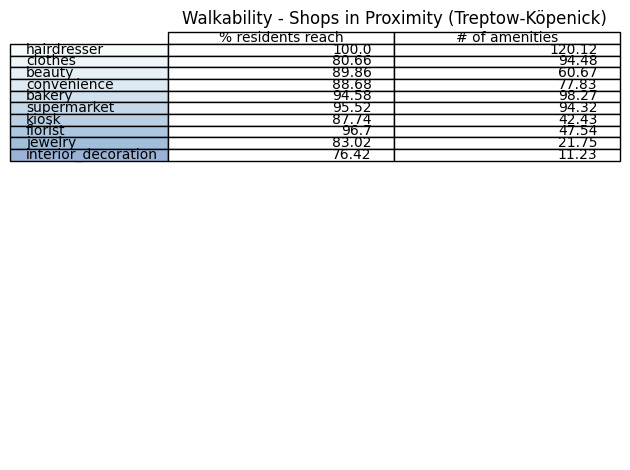

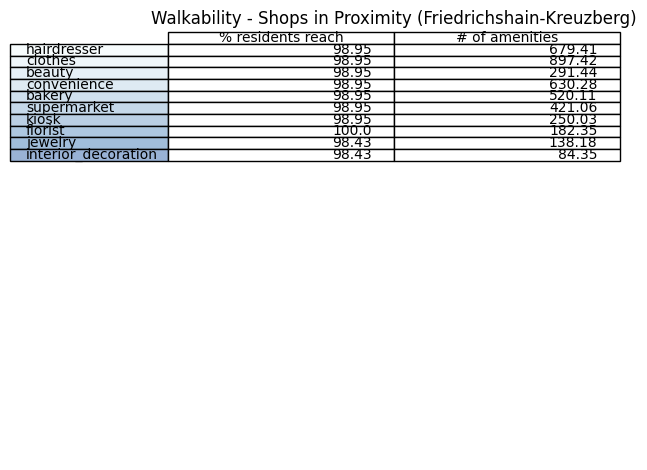

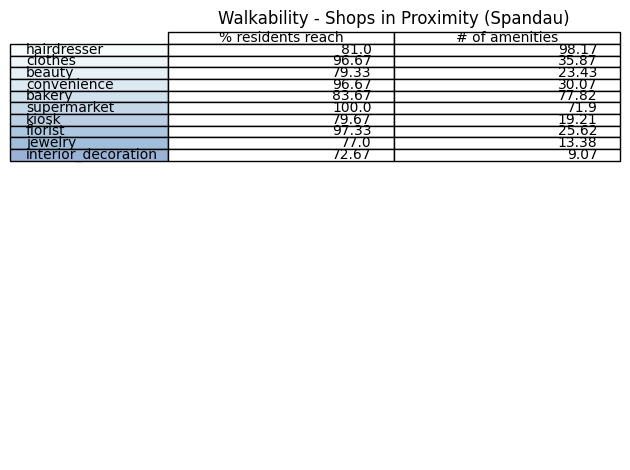

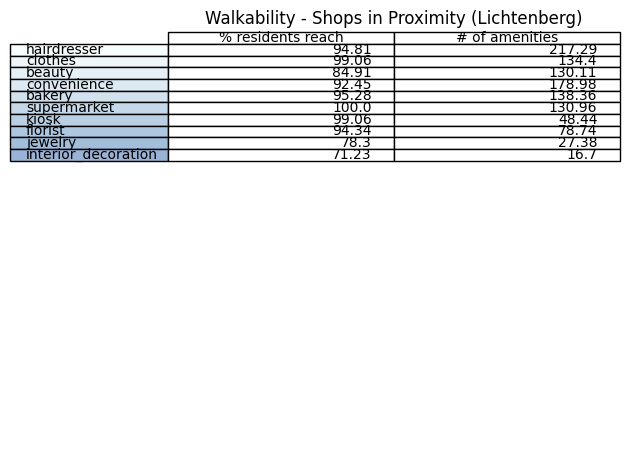

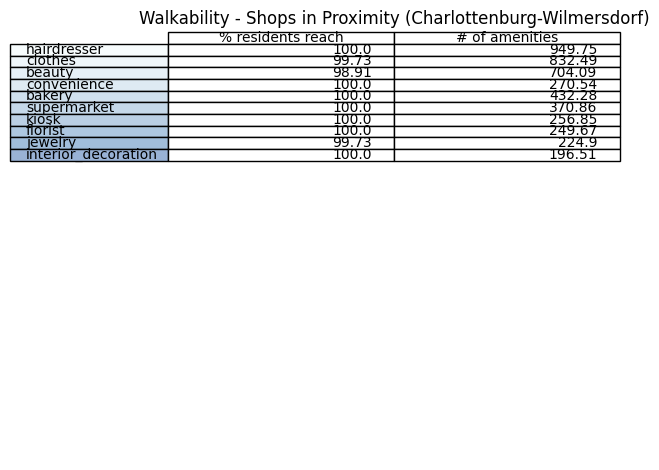

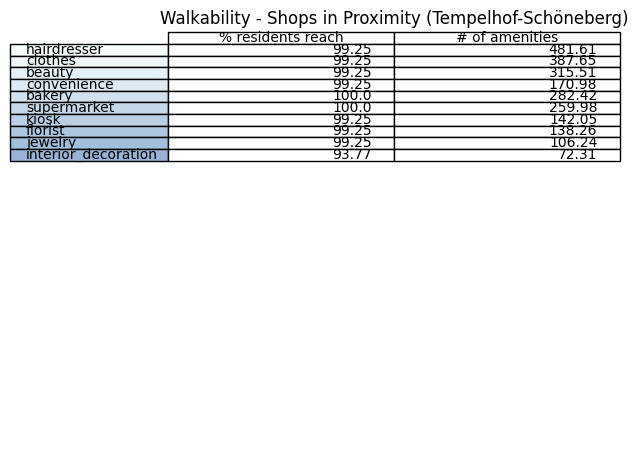

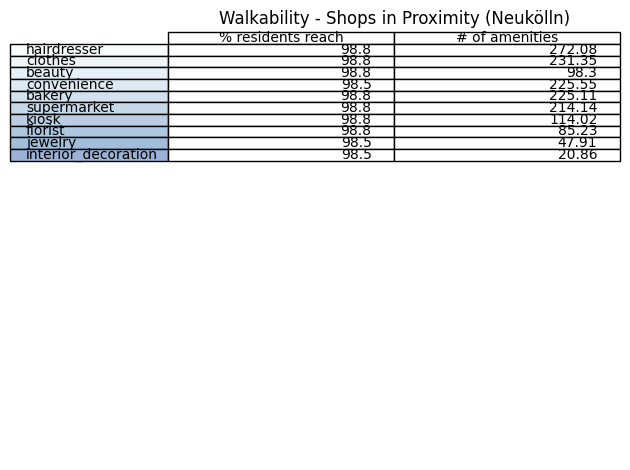

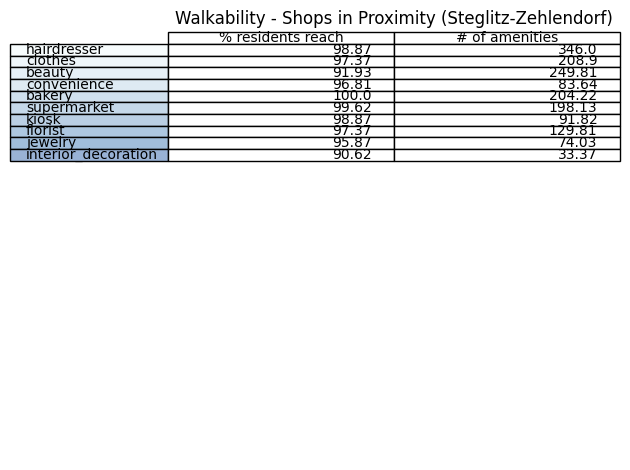

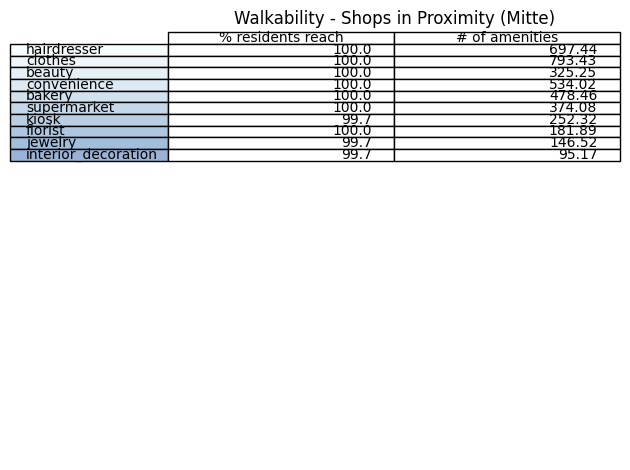

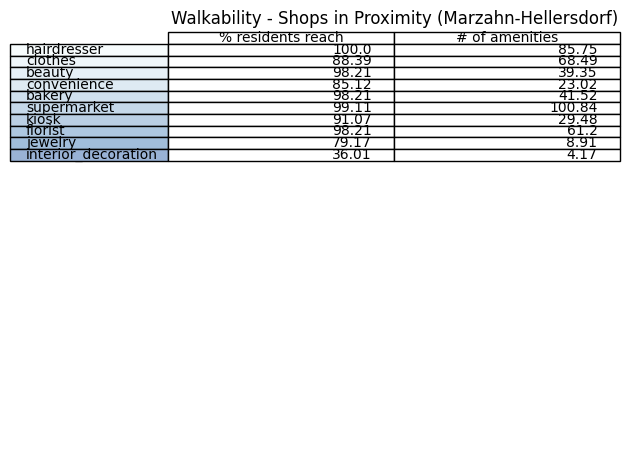

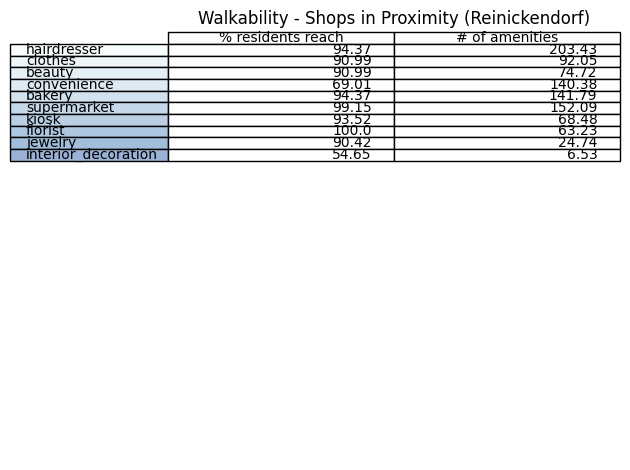

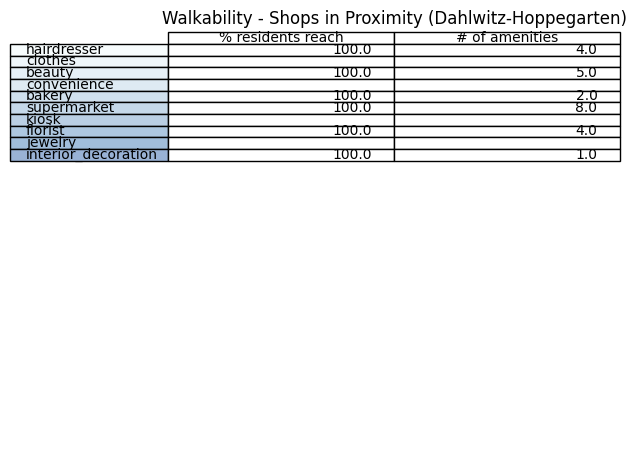

In [11]:
for district in agg_gdf['district name'].unique():

    max_residents = grouped_geom_shops.loc[district]['source node'].max()

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Hide the axis
    ax.axis('off')
    plot_text = []
    plot_col = ['% residents reach', '# of amenities']
    plot_rows = table_shops_labels[:10]

    for shop in plot_rows:
        if shop not in grouped_geom_shops.loc[district].index.get_level_values('amenity type'):
            plot_text.append([None, None])
            continue
        # plot_textplot_gdf = grouped_geom_shops
        plot_text.append([round((grouped_geom_shops.loc[district, shop]['source node']/max_residents*100), 2), round(grouped_geom_shops.loc[district, shop]['amenity type']/grouped_geom_shops.loc[district, shop]['source node'], 2)])

    # Get some pastel shades for the colors
    colors = plt.cm.BuPu(np.linspace(0, 0.5, len(table_rows)))
    table = plt.table(cellText=plot_text,
                        rowLabels=plot_rows,
                        rowColours=colors,
                        colLabels=plot_col,
                        bbox=[0, 0.7, 1, 0.3])
    plt.title(f'Walkability - Shops in Proximity ({district})')
    # Automatically adjust layout to minimize blank space
    plt.tight_layout()
    plt.show()

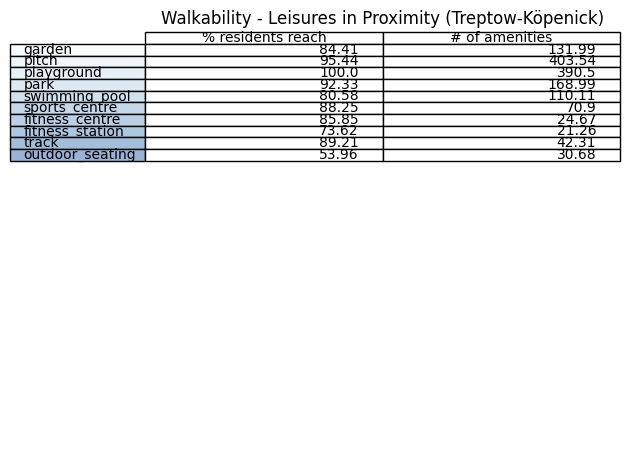

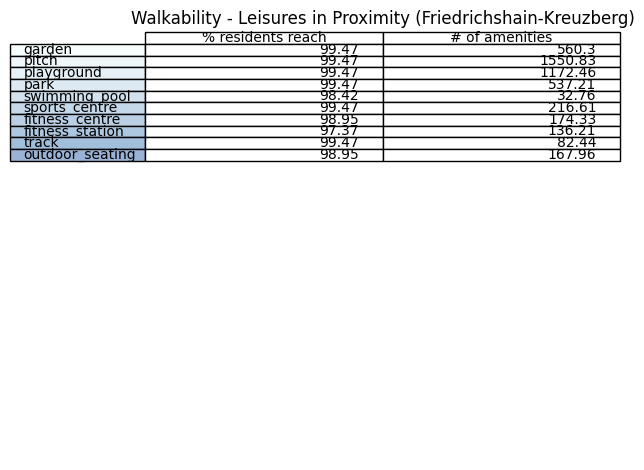

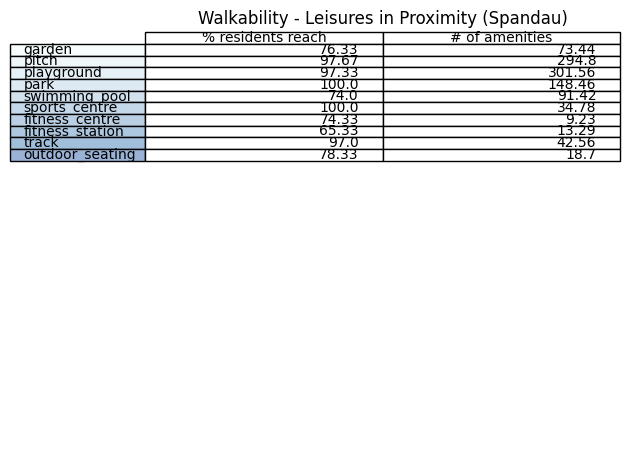

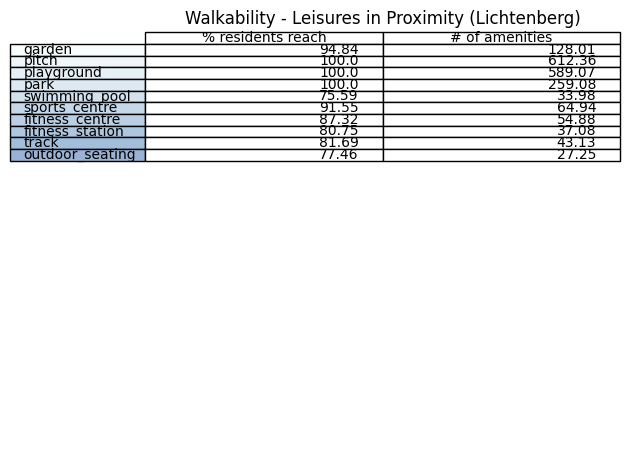

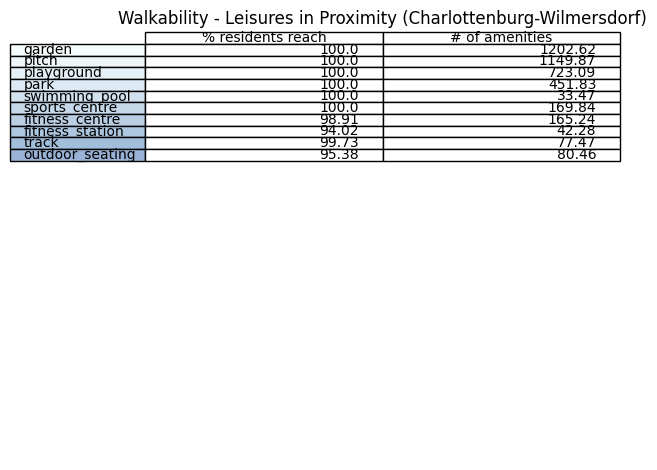

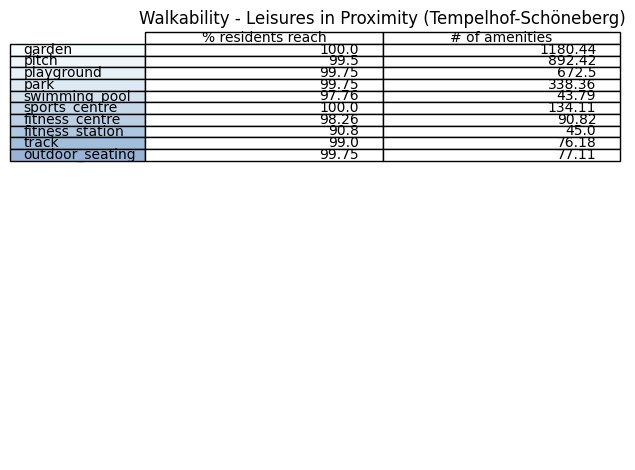

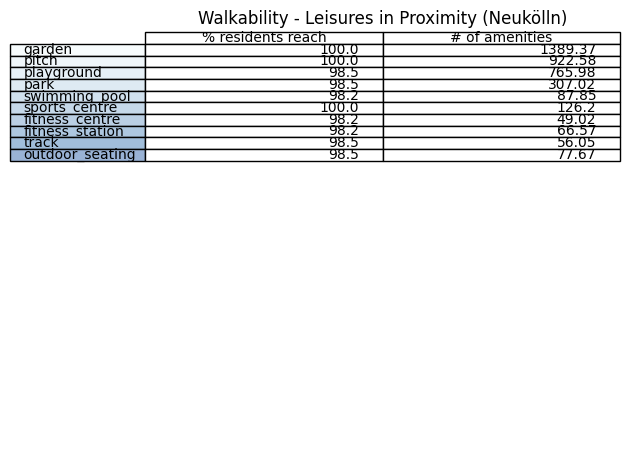

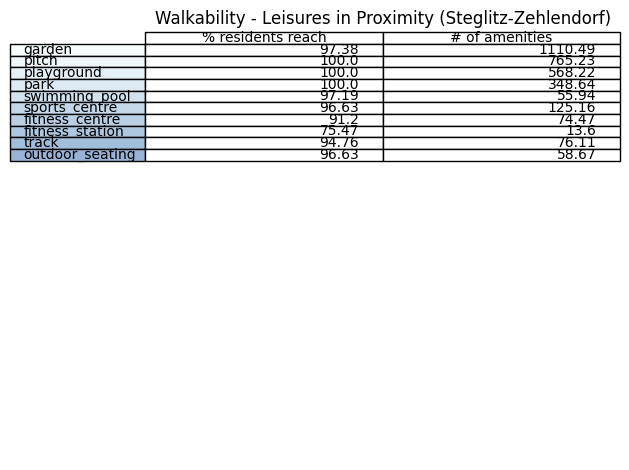

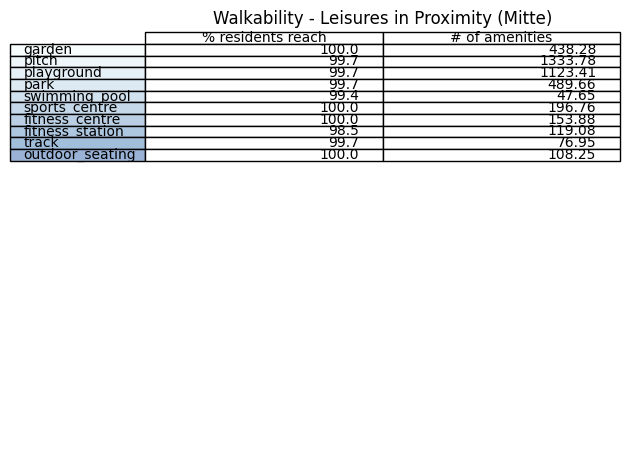

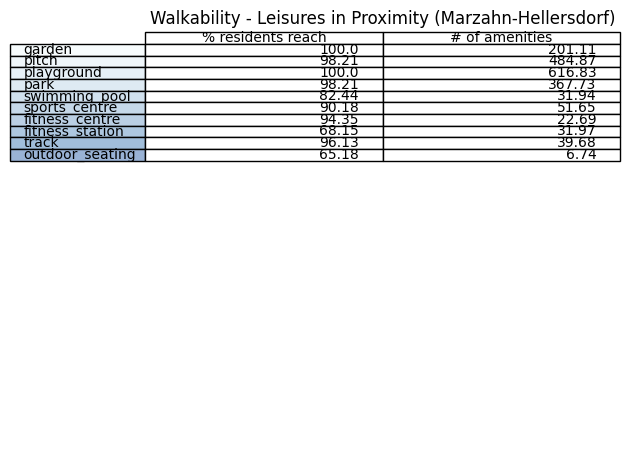

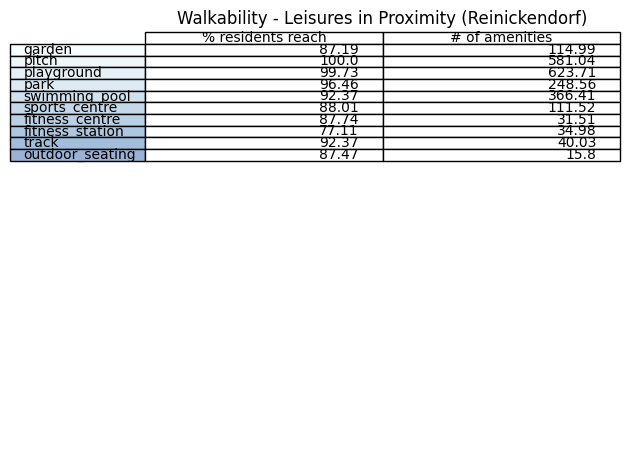

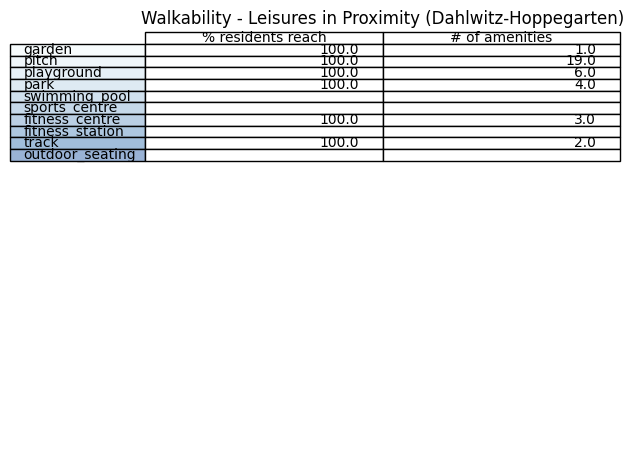

In [12]:
for district in agg_gdf['district name'].unique():

    max_residents = grouped_geom_leisures.loc[district]['source node'].max()

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Hide the axis
    ax.axis('off')
    plot_text = []
    plot_col = ['% residents reach', '# of amenities']
    plot_rows = table_leisures_labels[:10]

    for leisure in plot_rows:
        if leisure not in grouped_geom_leisures.loc[district].index.get_level_values('amenity type'):
            plot_text.append([None, None])
            continue
        # plot_textplot_gdf = grouped_geom_shops
        plot_text.append([round((grouped_geom_leisures.loc[district, leisure]['source node']/max_residents*100), 2), round(grouped_geom_leisures.loc[district, leisure]['amenity type']/grouped_geom_leisures.loc[district, leisure]['source node'], 2)])

    # Get some pastel shades for the colors
    colors = plt.cm.BuPu(np.linspace(0, 0.5, len(table_rows)))
    table = plt.table(cellText=plot_text,
                        rowLabels=plot_rows,
                        rowColours=colors,
                        colLabels=plot_col,
                        bbox=[0, 0.7, 1, 0.3])
    plt.title(f'Walkability - Leisures in Proximity ({district})')
    # Automatically adjust layout to minimize blank space
    plt.tight_layout()
    plt.show()